In [384]:
import pandas as pd
ticker=input("enter symbol of stock you want to analyse : ")

df = pd.read_csv("./dataset/CSV/"+ticker+".csv")
df= df.drop(['Low', 'High','Volume','Adjusted Close'], axis=1)
df
df['Stock Ticker']=[ticker]*len(df.index)

enter symbol of stock you want to analyse : A


In [385]:
df['50dayEWM'] = df['Open'].ewm(span=50, adjust=False).mean()
df['200dayEWM'] = df['Open'].ewm(span=200, adjust=False).mean()


In [386]:
def rsi(df, periods = 12, ema = True):
    """
    Returns a pd.Series with the relative strength index.
    """
    close_delta = df['Close'].diff()

    # Make two series: one for lower closes and one for higher closes
    up = close_delta.clip(lower=0)
    down = -1 * close_delta.clip(upper=0)
    
    if ema == True:
	    # Use exponential moving average
        ma_up = up.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
        ma_down = down.ewm(com = periods - 1, adjust=True, min_periods = periods).mean()
    else:
        # Use simple moving average
        ma_up = up.rolling(window = periods, adjust=False).mean()
        ma_down = down.rolling(window = periods, adjust=False).mean()
        
    rsi = ma_up / ma_down
    rsi = 100 - (100/(1 + rsi))
    return rsi
df['rsi']=rsi(df)

In [387]:
df

,Date,Open,Close,Stock Ticker,50dayEWM,200dayEWM,rsi
0,18-11-1999,32.546494,31.473534,A,32.546494,32.546494,NaN
1,19-11-1999,30.713518,28.880545,A,32.474612,32.528255,NaN
2,22-11-1999,29.551144,31.473534,A,32.359966,32.498632,NaN
3,23-11-1999,30.400572,28.612303,A,32.283127,32.477756,NaN
4,24-11-1999,28.701717,29.372318,A,32.142680,32.440183,NaN
...,...,...,...,...,...,...,...
5799,06-12-2022,152.149994,151.350006,A,141.778095,134.801206,55.541775
5800,07-12-2022,151.229996,153.729996,A,142.148758,134.964677,59.075691
5801,08-12-2022,154.419998,156.279999,A,142.629983,135.158262,62.554701
5802,09-12-2022,155.669998,152.949997,A,143.141356,135.362359,55.797298


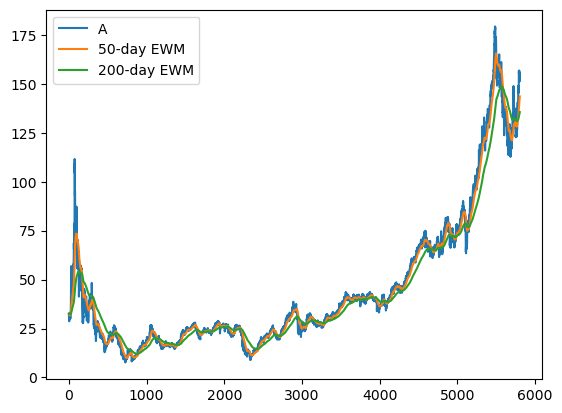

In [388]:
import matplotlib.pyplot as plt

plt.plot(df['Open'], label=ticker)
plt.plot(df['50dayEWM'], label='50-day EWM')
plt.plot(df['200dayEWM'], label='200-day EWM')
plt.legend(loc=2)



In [393]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
crossing = (((df['50dayEWM'] <= df['200dayEWM']) & (previous_50 >= previous_200))
            | ((df['50dayEWM'] >= df['200dayEWM']) & (previous_50 <= previous_200)))

In [394]:
crossing_dates = df.loc[crossing]


In [395]:
df['Date'] = pd.to_datetime(df['Date'])

In [396]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
buys = (((df['50dayEWM'] <= df['200dayEWM']) & (previous_50 >= previous_200)))

In [397]:
previous_50 = df['50dayEWM'].shift(1)
previous_200 = df['200dayEWM'].shift(1)
sells = (((df['50dayEWM'] >= df['200dayEWM']) & (previous_50 <= previous_200)))


In [398]:
buy_dates = df.loc[buys]
sell_dates = df.loc[sells]
buy_dates

,Date,Open,Close,Stock Ticker,50dayEWM,200dayEWM,rsi
1,1999-11-19,30.713518,28.880545,A,32.474612,32.528255,NaN
171,2000-07-25,35.094776,32.010014,A,52.127683,52.588328,25.761654
623,2002-05-16,21.280401,21.173103,A,22.407573,22.432859,46.213430
1140,2004-04-06,18.097282,18.040056,A,19.768038,19.794274,40.196877
1668,2006-11-07,21.924177,21.587982,A,24.001783,24.051983,33.588912
1828,2007-01-03,22.281832,22.489269,A,23.499899,23.512424,35.658625
2054,2008-01-23,22.668097,23.912731,A,25.763081,25.820576,35.792718
2218,2008-09-16,21.802574,22.331903,A,24.621933,24.686690,29.961643
2690,2010-02-08,20.278971,20.615166,A,21.435785,21.470141,49.778309
2956,2011-08-19,22.703863,22.231760,A,30.319274,30.523811,28.343024


In [399]:
buyindex=df.index[buys].tolist()
print(buyindex)
buy_dates
profit=0
loss=0
profits=[]
rsi_list=[]
for i in buyindex:
    if i>200 and df.loc[i]['Open'] !=0:
        buy=df.loc[i]['Open']
        rsi_list.append(df.loc[i]['rsi'])
        print("-----")

        for j in range(i,i+265):
            
            p=df.loc[j]['Open']-buy
            if p/buy<-0.1:
                print(buy,df.loc[j]['Open'],p,j-i,df.loc[i]['rsi'])
                
                print("stoploss hit")
                loss=loss+1
                profits.append(p/buy)
                break
            elif p/buy>0.1:
                print(buy,df.loc[j]['Open'],p,j-i,df.loc[i]['rsi'])
                profit=profit+1
                profits.append(p/buy)
                break
        print(j-i)
        if j-i==264:
            if buy<df.loc[j]['Open']:
                print(buy,df.loc[j]['Open'],p,j-i)
                profit=profit+1
                profit.append((df.loc[j]['Open']-buy)/buy)
            else :
                print(buy,df.loc[j]['Open'],p,j-i)
                print("yearend exit")
                profit.append((df.loc[j]['Open']-buy)/buy)
                loss=loss+1
        


                
        



[1, 171, 623, 1140, 1668, 1828, 2054, 2218, 2690, 2956, 3170, 3759, 3821, 3927, 4072, 4675, 4949, 5116, 5590]
-----
21.2804012298584 19.02718162536621 -2.2532196044921875 9 46.21342978852639
stoploss hit
9
-----
18.09728240966797 21.108726501464844 3.011444091796875 15 40.196877299848474
15
-----
21.924177169799805 19.620887756347656 -2.3032894134521484 21 33.58891182613728
stoploss hit
21
-----
22.281831741333008 24.799713134765625 2.517881393432617 24 35.65862461695518
24
-----
22.6680965423584 25.32904052734375 2.6609439849853516 80 35.79271790654546
80
-----
21.802574157714844 19.49928474426269 -2.303289413452152 15 29.96164348305787
stoploss hit
15
-----
20.27897071838379 22.93991470336914 2.6609439849853516 39 49.77830854836004
39
-----
22.7038631439209 25.350500106811523 2.646636962890625 6 28.34302429208293
6
-----
27.18168830871582 30.164520263671875 2.9828319549560547 129 39.31095225882651
129
-----
39.048641204833984 43.59000015258789 4.541358947753906 112 50.59712225617897


In [400]:
print(profit,loss)

12 5


In [401]:
print(profits)
print(rsi_list)

[-0.10588238352060342, 0.16640311089957324, -0.10505705165641938, 0.11300154415769703, 0.1173871824664686, -0.10564300328900075, 0.13121691539172092, 0.11657209815410989, 0.10973681697319766, 0.11630005059412192, 0.10236840499074835, -0.12908204002440465, 0.1049101099916306, 0.12417373742467715, 0.11205779258094539, 0.14685624416802484, -0.1257950745707265]
[46.21342978852639, 40.196877299848474, 33.58891182613728, 35.65862461695518, 35.79271790654546, 29.96164348305787, 49.77830854836004, 28.34302429208293, 39.31095225882651, 50.59712225617897, 43.07259277469018, 40.92029472538493, 29.77884980654703, 36.64773027638054, 39.276761438502696, 35.63951315532378, 45.16344409722945]


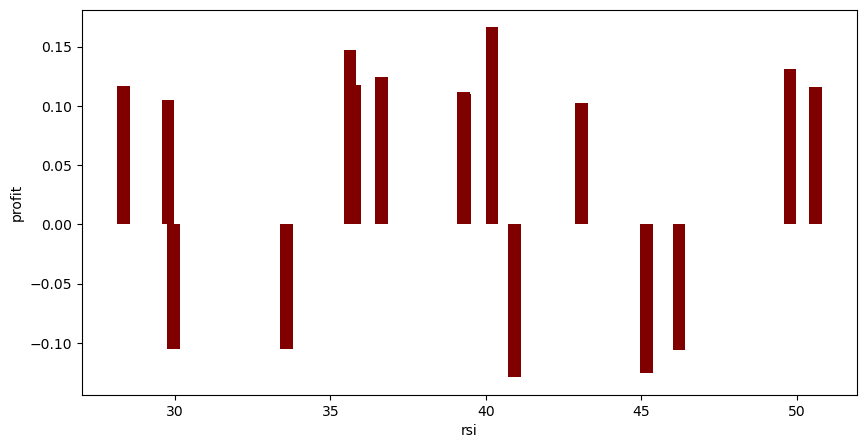

In [402]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(rsi_list, profits, color ='maroon',
        width = 0.4)
 
plt.xlabel("rsi")
plt.ylabel("profit")
plt.show()

In [406]:
cap=1
for i in profits:
    cap=cap*(1+i)
print("capital invested in ",ticker, " is multiplied by ",cap)

capital invested in  A  is multiplied by  2.159715822770205
